# import libraries and clean data

In [3]:
#import necessary libraries

#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#additional stop words
from spacy.lang.en.stop_words import STOP_WORDS

from collections import Counter

In [4]:
# read in the data
df = pd.read_csv(r'data/bible_data_set_kjv.csv', encoding="cp1252")

In [5]:
df.head(10)

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness..."
5,Genesis 1:6,Genesis,1,6,"And God said, Let there be a firmament in the ..."
6,Genesis 1:7,Genesis,1,7,"And God made the firmament, and divided the wa..."
7,Genesis 1:8,Genesis,1,8,And God called the firmament Heaven. And the e...
8,Genesis 1:9,Genesis,1,9,"And God said, Let the waters under the heaven ..."
9,Genesis 1:10,Genesis,1,10,And God called the dry land Earth; and the gat...


In [6]:
# list of relevant books (NT)
NTbooks = ['Matthew','Mark','Luke','John','Acts',
         'Romans','1 Corinthians','2 Corinthians','Galatians','Ephesians','Philippians','Colossians',
         '1 Thessalonians','2 Thessalonians','1 Timothy','2 Timothy','Titus','Philemon','Hebrews','James',
           '1 Peter','2 Peter','1 John','2 John','3 John','Jude','Revelation']

In [9]:


def change_book_text(row):
    ''' Function to clean the book names and make them representation standard'''
    
    book = row['book']
    
    if 'matthew' in book.lower():
        book = 'Matthew'
    elif 'mark' in book.lower():
        book = 'Mark'
    elif 'luke' in book.lower():
        book = 'Luke'
    elif 'john' in book.lower():
        book = 'John'
    elif 'acts' in book.lower():
        book = 'Acts'
    elif 'romans' in book.lower():
        book = 'Romans'
    elif '1 corinthians' in book.lower():
        book = '1 Corinthians'
    elif '2 corinthians' in book.lower():
        book = '2 Corinthians'
    elif 'galatians' in book.lower():
        book = 'Galatians'
    elif 'ephesians' in book.lower():
        book = 'Ephesians'
    elif 'philippians' in book.lower():
        book = 'Philippians'
    elif 'colossians' in book.lower():
        book = 'Colossians'
    elif '1 thessalonians' in book.lower():
        book = '1 Thessalonians'
    elif '2 thessalonians' in book.lower():
        book = '2 Thessalonians'
    elif '1 timothy' in book.lower():
        book = '1 Timothy'
    elif '2 timothy' in book.lower():
        book = '2 Timothy'
    elif 'titus' in book.lower():
        book = 'Titus'
    elif 'philemon' in book.lower():
        book = 'Philemon'
    elif 'hebrews' in book.lower():
        book = 'Hebrews'
    elif 'james' in book.lower():
        book = 'James'
    elif '1 peter' in book.lower():
        book = '1 Peter'
    elif '2 peter' in book.lower():
        book = '2 Peter'
    elif '1 john' in book.lower():
        book = '1 John'
    elif '2 john' in book.lower():
        book = '2 John'
    elif '3 john' in book.lower():
        book = '3 John'
    elif 'jude' in book.lower():
        book = 'Jude'
    elif 'revelation' in book.lower():
        book = 'Revelation'

    
    else:
        book = book[:-1]
    
    return book

In [10]:
# filter the dataframe to only those in the book list
df=df[df.book.isin(NTbooks)]
#filter to only the book and text columns
df=df[['book','text']]
# fix book names
df['book'] = df.apply(change_book_text, axis=1)

In [11]:
#verify all the names are fixed
df.book.unique()

array(['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans',
       '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians',
       'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians',
       '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James',
       '1 Peter', '2 Peter', 'Jude', 'Revelation'], dtype=object)

In [12]:
df.head()

,book,text
23145,Matthew,"The book of the generation of Jesus Christ, th..."
23146,Matthew,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,Matthew,And Judas begat Phares and Zara of Thamar; and...
23148,Matthew,And Aram begat Aminadab; and Aminadab begat Na...
23149,Matthew,And Salmon begat Booz of Rachab; and Booz bega...


In [13]:
# update stopwords
# DISCLAIMER: I DID NOT DO IT FOR THE GOSPELS

stop_words = {'unto','said','man','thee','hath','go','done','neither','came','begat','whosoever','take'
             'brought','eunuch','ye'}
STOP_WORDS.update(stop_words) #spacy stop words
STOPWORDS.update(stop_words) #WordCloud stop words

## Method 1 | UseWordCloud to process the text

In [17]:
# WordCloud needs one string of text to generate the wordcloud image, 
# so we will filter and combine the text of one candidate

#filter the df to one candidate, and create a list of responses from them
text = df[df.book.isin(NTbooks)].text.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',
                      collocations=True).generate(text)

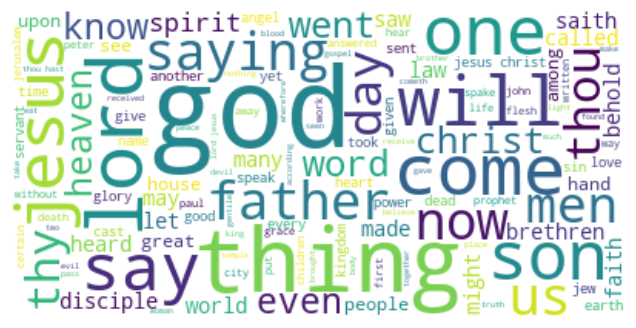

In [18]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [31]:
# just for fun

In [32]:
word_freq={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}

rel_freq=wordcloud.words_

In [33]:

print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('jesus', 492), ('son', 329), ('god', 313), ('father', 270), ('will', 269)]
[('jesus', 1.0), ('son', 0.6686991869918699), ('god', 0.6361788617886179), ('father', 0.5487804878048781), ('will', 0.5467479674796748)]


In [21]:
# WordCloud needs one string of text to generate the wordcloud image, 
# so we will filter and combine the text of one book

#filter the df to one book, and create a list of responses from them
text = df[df.book=='John'].text.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)
list({k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}.items())[:5]

[('jesus', 186), ('father', 158), ('god', 155), ('world', 104), ('know', 99)]

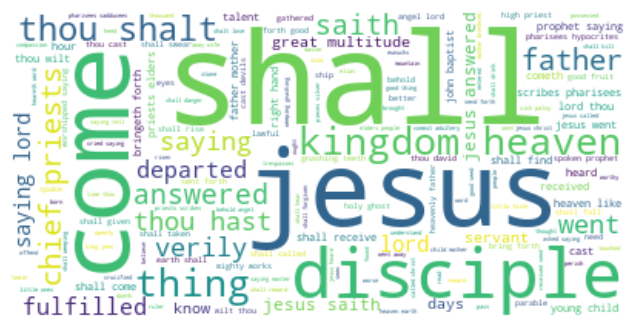

In [22]:
# WordCloud needs one string of text to generate the wordcloud image, 
# so we will filter and combine the text of one book

#filter the df to one book, and create a list of responses from them
text = df[df.book=='Matthew'].text.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOP_WORDS, background_color='white',
                      collocations=True,
                      min_word_length =4,
                      collocation_threshold=3).generate(text)

text1_dict={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}

plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

## Method 2 | Utilizing Word Frequencies

In [23]:
# create a list of gospels
books = df.book.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(df[(df.book==gospel)].text.tolist()) for gospel in books]

In [24]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate a CountVectorizer object
# Übergebe STOP_WORDS als Liste
cv = CountVectorizer(stop_words=list(STOP_WORDS), ngram_range=(1, 3))

In [25]:
# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

C:\Users\tschm\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [26]:
#bow=pd.DataFrame(X, columns = cv.get_feature_names())
# Verwende get_feature_names_out() statt get_feature_names()
bow = pd.DataFrame(X, columns=cv.get_feature_names_out())
bow.index=books

In [29]:
bow.shape

(24, 111995)

In [30]:
bow.head()

,aaron,aaron christ,aaron christ glorified,aaron elisabeth,aaron elisabeth righteous,aaron gods,aaron gods moses,aaron priesthood,aaron priesthood changed,aaron rod,...,zenas,zenas lawyer,zenas lawyer apollos,zorobabel,zorobabel abiud,zorobabel abiud abiud,zorobabel son,zorobabel son salathiel,zorobabel zorobabel,zorobabel zorobabel abiud
Matthew,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,1,0,0,1,1
Mark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Luke,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
John,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acts,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


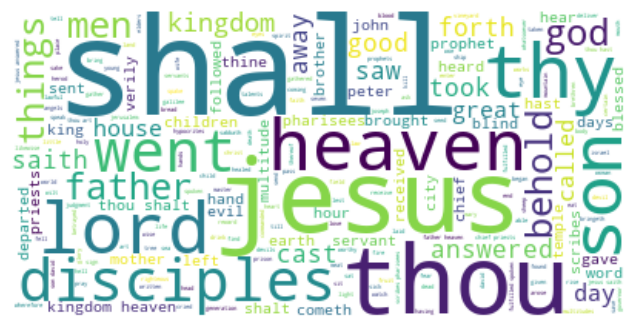

In [42]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['matthew'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['matthew'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Method 3 | Log Odds Ratio

In [43]:
from tqdm import tqdm  # für die Fortschrittsanzeige
import math
import numpy as np

# Leeres DataFrame erstellen
t_bow_df = pd.DataFrame()

# Frequenznormalisierung pro Buch
bow_transformed = bow.apply(lambda x: (x + 1) / (bow.loc[x.name].sum() + 1), axis=1)

for gospel in tqdm(books):
    feat_s = bow[bow.index != gospel].sum() + 1  # Summe aller Wortfrequenzen ohne das aktuelle Evangelium
    feat_s_all = np.sum(bow[bow.index != gospel].sum())  # Gesamtanzahl der Worte ohne das Evangelium
    tot = feat_s / feat_s_all  # Frequenz der Worte bei den anderen Evangelien
    row = bow_transformed.loc[gospel] / tot  # Frequenz des Evangeliums geteilt durch die der anderen
    row = pd.DataFrame(row).T  # in DataFrame umwandeln und transponieren
    
    # Logarithmus auf die Werte anwenden mit `.map()`
    results = row.map(lambda x: math.log(x, 2)).values  # `.map` statt `.applymap`
    
    # Ein DataFrame mit der richtigen Form aus `results` erstellen
    results_df = pd.DataFrame(results, index=[gospel], columns=row.columns)
    
    t_bow_df = pd.concat([t_bow_df, results_df])  # Ergebnistabelle anfügen



100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


In [44]:
t_bow_df.head()

,aaron,aaron elisabeth,aaron elisabeth righteous,abased,abased humbleth,abased humbleth shall,abased shall,abased shall humble,abba,abba father,...,zelotes,zelotes judas,zelotes judas brother,zorobabel,zorobabel abiud,zorobabel abiud abiud,zorobabel son,zorobabel son salathiel,zorobabel zorobabel,zorobabel zorobabel abiud
matthew,0.248311,0.248311,0.248311,0.663349,-0.336651,-0.336651,2.248311,2.248311,0.248311,0.248311,...,0.248311,0.248311,0.248311,1.833274,2.248311,2.248311,0.248311,0.248311,2.248311,2.248311
mark,1.206829,1.206829,1.206829,0.206829,0.621867,0.621867,1.206829,1.206829,3.206829,3.206829,...,1.206829,1.206829,1.206829,0.206829,1.206829,1.206829,1.206829,1.206829,1.206829,1.206829
luke,2.163812,2.163812,2.163812,1.748774,2.748774,2.748774,0.163812,0.163812,0.163812,0.163812,...,2.163812,2.163812,2.163812,0.578849,0.163812,0.163812,2.163812,2.163812,0.163812,0.163812
john,0.849997,0.849997,0.849997,-0.150003,0.265035,0.265035,0.849997,0.849997,0.849997,0.849997,...,0.849997,0.849997,0.849997,-0.150003,0.849997,0.849997,0.849997,0.849997,0.849997,0.849997


In [45]:
t_bow_df.loc['matthew'].sort_values(ascending=False)[:10]

kingdom heaven      6.335774
talents             4.948751
fulfilled spoken    4.833274
young child         4.570239
tares               4.418236
shall swear         4.055666
dream               4.055666
eunuchs             3.833274
end world           3.833274
break               3.833274
Name: matthew, dtype: float64

In [46]:
text=t_bow_df.loc['matthew'].sort_values(ascending=False)[:4000]
text3_dict={k: v for k, v in sorted(text.items(),reverse=True, key=lambda item: item[1])}

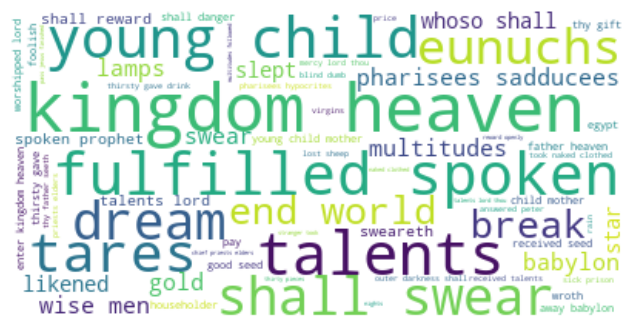

In [47]:
wordcloud = WordCloud(min_word_length =3,
                      background_color='white').generate_from_frequencies(text3_dict)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
# find the most common word frequency from the first dictionary
# and divide by the most common word frequency in the second dictionary
multiplier=((Counter(text1_dict).most_common(1)[0][1]))/Counter(text3_dict).most_common(1)[0][1]

# multiply the value in dictionary 2, by the mutiplier above to make 
# the top value equal to the first dictionary. Use subsequently smaller values of the multiplier 
text3_dict={k[0]:int(k[1]*v) for k, v in zip(text3_dict.items(),np.linspace(multiplier, 1, 4000) )}  

In [49]:
#combine the two dictionaries
full_dict = Counter(text3_dict)+Counter(text1_dict)
# add word frequency values from 'health care' and 'healthcare' into one key
full_dict['health care'] = full_dict.get('health care', 0) + full_dict.get('healthcare', 0)

In [50]:
#sort the dictionary
full_dict={k: v for k, v in sorted(full_dict.items(),reverse=True, key=lambda item: item[1])}

In [51]:
# list the top 5
list(full_dict.items())[:5]

[('kingdom heaven', 116),
 ('shall', 83),
 ('young child', 68),
 ('talents', 64),
 ('fulfilled spoken', 63)]

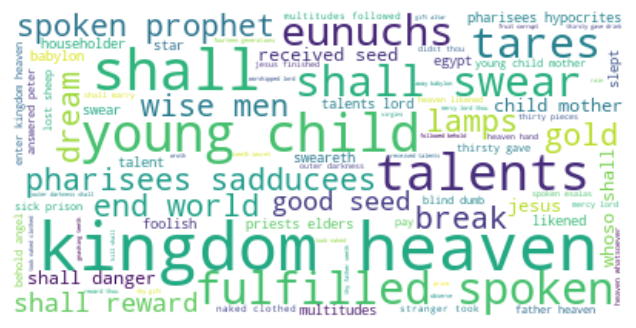

In [52]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(full_dict)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# word cloud image

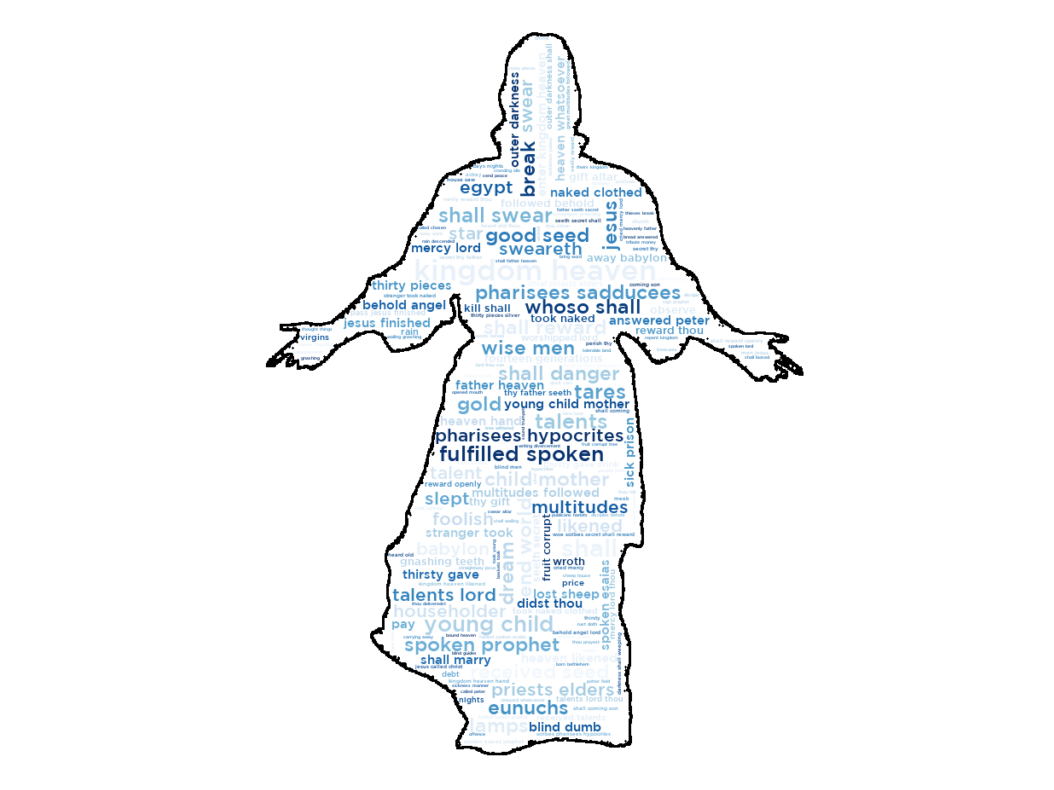

In [56]:
### colormap

# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('photos\\jesus2.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


wordcloud = WordCloud(font_path = 'font\\GothamMedium.ttf',
                      background_color='white',
                      contour_color='black',
                      mask=cand_mask, colormap='Blues',
                      contour_width=4).generate_from_frequencies(full_dict)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()